In [21]:
import importlib

In [39]:
# import from basic packages
from fastai.vision.all import *
import matplotlib.pyplot as plt
from pathlib import Path

# Import our helper functions
from utils import (
    delete_images,
    download_single_image,
    download_dataset,
    inference_new_image,
    plot_cat_probabilities
)

In [38]:
import utils
importlib.reload(utils)

<module 'utils' from '/Users/jamesbyers/code/github/japanese-food-classifier/utils.py'>

In [34]:
# delete any old images at the top level
extensions = ['jpg', 'JPG', 'jpeg', 'png', 'webp', 'jpg!d', 'ashx', 'gif']
delete_images(extensions, depth=1, verbose=False)

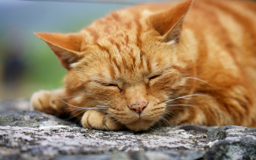

In [43]:
# download a test image to confirm everything works
dest = download_single_image('cat')
delete_images(extensions, depth=1, verbose=False)

In [41]:
# define search terms
terms = [
    'sushi',
    'udon',
    'tofu',
    'tempura',
    'yakitori',
    'sashimi',
    'ramen',
    'donburi',
    'natto',
    'oden',
    'tamagoyaki',
    'soba',
    'tonkatsu',
    'kashi pan',
    'sukiyaki',
    'miso soup',
    'okonomiyaki',
    'mentaiko',
    'nikujaga',
    'curry rice',
    'unagi no kabayaki',
    'shabu shabu hot pot',
    'onigiri',
    'gyoza',
    'takoyaki',
    'kaiseki ryori',
    'edamame',
    'yakisoba',
    'chawanmushi',
    'wagashi'
]

In [44]:
# download a dataset of images
dataset_path = download_dataset(terms, 'japanese_food', force=False)

In [45]:
# build a datablock and dataloader
blocks = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    splitter=RandomSplitter(valid_pct=0.2),
    get_y=parent_label,
    get_items=get_image_files,
    item_tfms=[Resize(192, method='squish')]
)
dls = blocks.dataloaders(dataset_path)

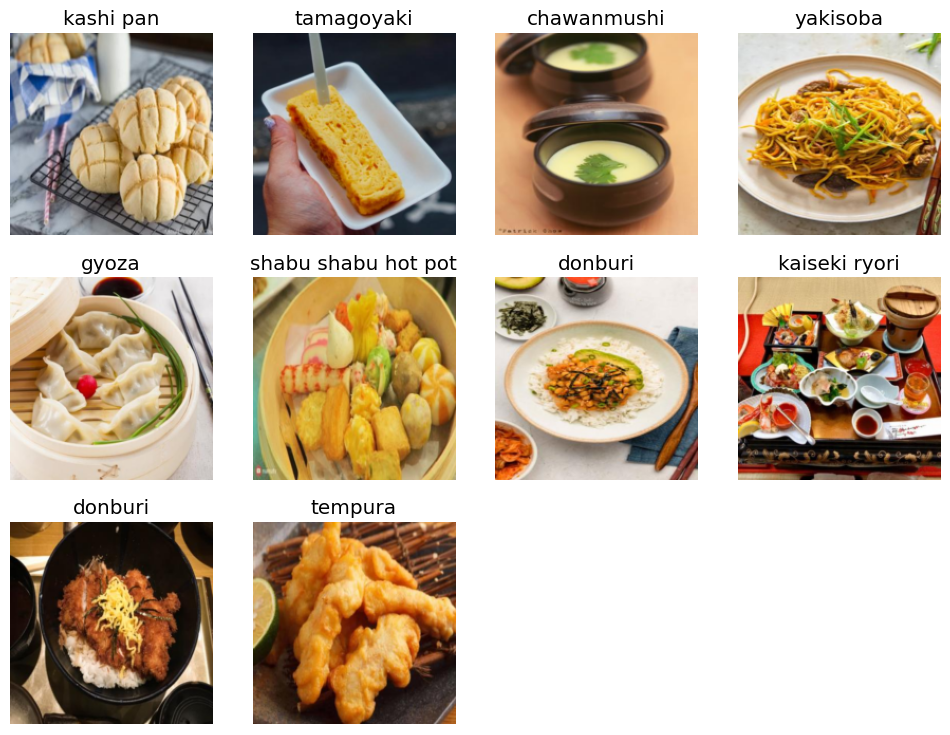

In [46]:
# 6. look at a few exa,ples
dls.show_batch(max_n=10)

In [47]:
# create a learer and train
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,3.385115,1.678564,0.477707,02:51


epoch,train_loss,valid_loss,error_rate,time
0,1.718465,1.329718,0.369427,03:18
1,1.100933,1.179248,0.326661,03:33
2,0.600805,1.159894,0.323021,03:35


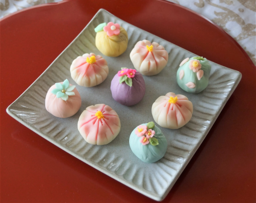

Category: wagashi; Prob: 99.73%
Type of 'probs': <class 'torch.Tensor'>


In [48]:
# run an infernce example
term = 'wagashi'
cat, cat_idx, probs = inference_new_image(term, learn, display_result=True)
print(f"Type of 'probs': {type(probs)}")

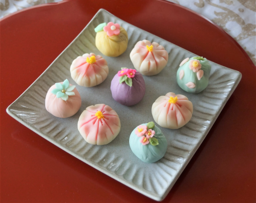

In [49]:
# manually download and predict on a new image (no guarantee it's not in the training set
image_dest = download_single_image(term, view=True)
_, _, probs = learn.predict(image_dest)

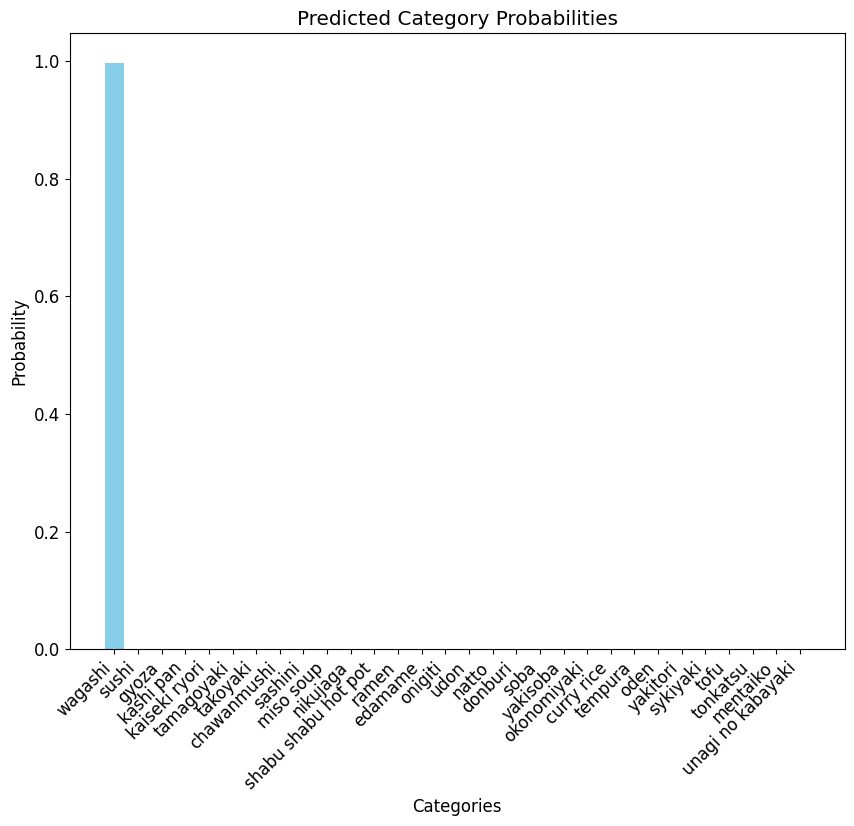

In [50]:
# plot predicted probabilities
plot_cat_probabilities(probs, learn)

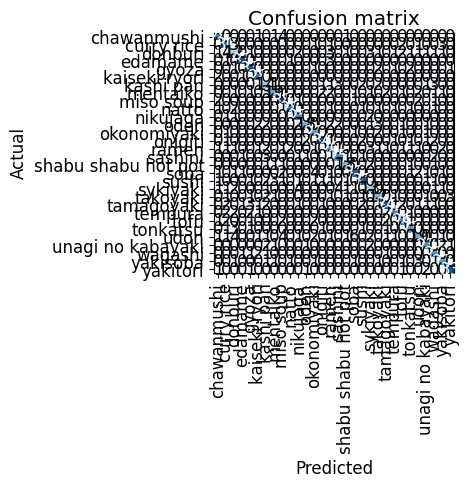

In [51]:
# confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [52]:
# export the model to a .pkl file
learn.export(fname='model_2025_01_19_japanese-food_01.pkl')